# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
citiesdf=pd.DataFrame({'City':cities})
citiesdf['Country']=""
citiesdf['Date']=""
citiesdf['Humidity']=""
citiesdf['Cloudiness']=""
citiesdf['Lat']=""
citiesdf['Lng']=""
citiesdf['Max Temp']=""
citiesdf['Wind Speed']=""

citiesdf.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,,,,,,,,
1,belmonte,,,,,,,,
2,belebey,,,,,,,,
3,hermanus,,,,,,,,
4,santa rosa,,,,,,,,


In [72]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

In [73]:
for index, row in citiesdf.iterrows():
    city = row['City']
    response = requests.get(query_url + city + '&units=imperial').json()
    try:
        citiesdf.loc[index, 'Country'] = response['sys']['country']
        citiesdf.loc[index, 'Date'] = response['dt']
        citiesdf.loc[index, 'Humidity'] = response['main']['humidity']
        citiesdf.loc[index, 'Cloudiness'] = response['clouds']['all']
        citiesdf.loc[index, 'Lat'] = response['coord']['lat']
        citiesdf.loc[index, 'Lng'] = response['coord']['lon']
        citiesdf.loc[index, 'Max Temp'] = response['main']['temp_max']
        citiesdf.loc[index, 'Wind Speed'] = response['wind']['speed']    
        print(f"Processing Record {index} for: {city}.")
    except (KeyError, IndexError):
        print('data not found, skipping')
        next
    print('===========================')


Processing Record 0 for: punta arenas.
Processing Record 1 for: belmonte.
Processing Record 2 for: belebey.
Processing Record 3 for: hermanus.
Processing Record 4 for: santa rosa.
Processing Record 5 for: laguna.
Processing Record 6 for: haines junction.
Processing Record 7 for: ponta do sol.
Processing Record 8 for: dingle.
Processing Record 9 for: atuona.
Processing Record 10 for: yellowknife.
Processing Record 11 for: bethel.
Processing Record 12 for: bredasdorp.
Processing Record 13 for: hilo.
Processing Record 14 for: lata.
Processing Record 15 for: mount gambier.
Processing Record 16 for: vaini.
Processing Record 17 for: butaritari.
Processing Record 18 for: lircay.
Processing Record 19 for: saint-philippe.
Processing Record 20 for: penticton.
Processing Record 21 for: riyadh.
Processing Record 22 for: khatanga.
Processing Record 23 for: sao filipe.
Processing Record 24 for: clyde river.
data not found, skipping
Processing Record 26 for: san patricio.
Processing Record 27 for: ge

Processing Record 130 for: pisco.
Processing Record 131 for: bonthe.
Processing Record 132 for: avera.
Processing Record 133 for: pitsunda.
Processing Record 134 for: kefalos.
Processing Record 135 for: hithadhoo.
data not found, skipping
Processing Record 137 for: nikolskoye.
data not found, skipping
Processing Record 139 for: mehamn.
Processing Record 140 for: port blair.
data not found, skipping
Processing Record 142 for: florence.
Processing Record 143 for: akdepe.
Processing Record 144 for: touros.
data not found, skipping
Processing Record 146 for: port alfred.
Processing Record 147 for: puerto del rosario.
Processing Record 148 for: beringovskiy.
Processing Record 149 for: mao.
Processing Record 150 for: vila franca do campo.
data not found, skipping
Processing Record 152 for: brae.
Processing Record 153 for: marystown.
Processing Record 154 for: namatanai.
Processing Record 155 for: coquimbo.
Processing Record 156 for: nanortalik.
Processing Record 157 for: necochea.
Processing

Processing Record 258 for: karasuk.
Processing Record 259 for: college.
Processing Record 260 for: kabansk.
Processing Record 261 for: tiznit.
Processing Record 262 for: mezhdurechensk.
Processing Record 263 for: dumas.
Processing Record 264 for: saint-pierre.
Processing Record 265 for: nargana.
Processing Record 266 for: arman.
Processing Record 267 for: paamiut.
Processing Record 268 for: lompoc.
Processing Record 269 for: lavrentiya.
Processing Record 270 for: dikson.
data not found, skipping
Processing Record 272 for: takhatgarh.
Processing Record 273 for: iwaki.
Processing Record 274 for: olinda.
Processing Record 275 for: cidreira.
Processing Record 276 for: nortelandia.
Processing Record 277 for: whitehorse.
Processing Record 278 for: mercedes.
Processing Record 279 for: bandarbeyla.
Processing Record 280 for: flin flon.
Processing Record 281 for: bhawanigarh.
Processing Record 282 for: flagstaff.
Processing Record 283 for: pangnirtung.
Processing Record 284 for: veere.
Processi

Processing Record 388 for: mazagao.
Processing Record 389 for: coos bay.
Processing Record 390 for: carbonia.
Processing Record 391 for: changli.
Processing Record 392 for: xining.
Processing Record 393 for: cayenne.
Processing Record 394 for: gazi.
Processing Record 395 for: vitim.
Processing Record 396 for: flers.
Processing Record 397 for: miles city.
Processing Record 398 for: la seyne-sur-mer.
Processing Record 399 for: te anau.
Processing Record 400 for: bellefontaine.
Processing Record 401 for: razdolinsk.
Processing Record 402 for: bathsheba.
Processing Record 403 for: high level.
Processing Record 404 for: bocaiuva.
Processing Record 405 for: hualmay.
Processing Record 406 for: alofi.
data not found, skipping
Processing Record 408 for: killam.
Processing Record 409 for: dudinka.
Processing Record 410 for: marshall.
Processing Record 411 for: amga.
Processing Record 412 for: san luis.
Processing Record 413 for: caravelas.
Processing Record 414 for: bukachacha.
Processing Record

Processing Record 517 for: mahibadhoo.
Processing Record 518 for: plettenberg bay.
Processing Record 519 for: ca mau.
Processing Record 520 for: ust-shonosha.
Processing Record 521 for: den helder.
data not found, skipping
Processing Record 523 for: kozhva.
Processing Record 524 for: puerto el triunfo.
Processing Record 525 for: mina.
Processing Record 526 for: svecha.
Processing Record 527 for: djenne.
Processing Record 528 for: pagudpud.
Processing Record 529 for: severo-kurilsk.
Processing Record 530 for: nantucket.
Processing Record 531 for: berlin.
Processing Record 532 for: naranjal.
Processing Record 533 for: emerald.
Processing Record 534 for: rio gallegos.
Processing Record 535 for: pyapon.
Processing Record 536 for: hay river.
Processing Record 537 for: khandyga.
Processing Record 538 for: jaumave.
Processing Record 539 for: margate.
data not found, skipping
Processing Record 541 for: meget.
Processing Record 542 for: dwarka.
Processing Record 543 for: rio muerto.
Processing 

In [74]:
pprint(response)

{'base': 'model',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -7.91, 'lon': 113.82},
 'dt': 1579816495,
 'id': 1648266,
 'main': {'feels_like': 70.21,
          'grnd_level': 913,
          'humidity': 92,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 66.69,
          'temp_max': 66.69,
          'temp_min': 66.69},
 'name': 'Bondowoso',
 'sys': {'country': 'ID', 'sunrise': 1579818098, 'sunset': 1579863072},
 'timezone': 25200,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 2.57}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
citiesdf=citiesdf.replace(r'^\s*$', np.nan, regex=True)
citiesdf=citiesdf.dropna(how='any')
output_data_file = "../output_data/cities.csv"
citiesdf.to_csv(output_data_file)

In [76]:
citiesdf.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,CL,1.579816e+09,54.0,75.0,-53.15,-70.92,55.40,16.11
1,belmonte,BR,1.579816e+09,83.0,90.0,-15.86,-38.88,77.00,8.05
2,belebey,RU,1.579816e+09,96.0,96.0,54.12,54.12,10.20,4.65
3,hermanus,ZA,1.579816e+09,79.0,0.0,-34.42,19.23,71.01,11.01
4,santa rosa,PH,1.579816e+09,74.0,75.0,14.31,121.11,78.80,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

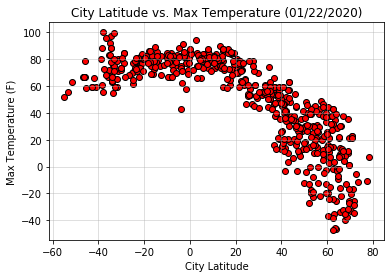

In [77]:
latitude=citiesdf['Lat']
max_temp=citiesdf['Max Temp']

plt.scatter(latitude, max_temp, facecolor='r', edgecolor='k')
plt.title('City Latitude vs. Max Temperature (01/22/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(alpha=0.5)

#### Latitude vs. Humidity Plot

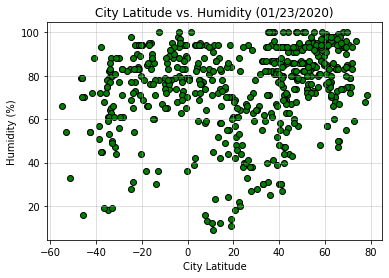

In [78]:
humidity=citiesdf['Humidity']

plt.scatter(latitude, humidity, facecolor='g', edgecolor='k')
plt.title('City Latitude vs. Humidity (01/23/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.grid(alpha=0.5)



#### Latitude vs. Cloudiness Plot

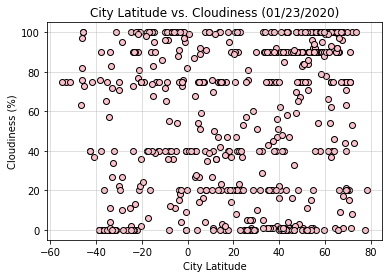

In [83]:
cloudiness=citiesdf['Cloudiness']

plt.scatter(latitude, cloudiness, facecolor='pink', edgecolor='k')
plt.title('City Latitude vs. Cloudiness (01/23/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(alpha=0.5)

#### Latitude vs. Wind Speed Plot

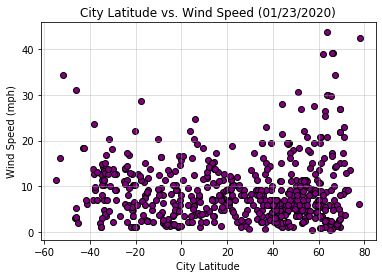

In [84]:
wind_speed=citiesdf['Wind Speed']

plt.scatter(latitude, wind_speed, facecolor='purple', edgecolor='k')
plt.title('City Latitude vs. Wind Speed (01/23/2020)')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(alpha=0.5)

## Linear Regression

In [107]:
# OPTIONAL: Create a function to create Linear Regression plots
def lregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x=float(input('x-value for location of line equation'))
    y=float(input('y-value for location of line equation'))
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.title(input('Title of figure:'))
    plt.xlabel(input('X-label:'))
    plt.ylabel(input('Y-label:'))
    plt.grid()
    plt.show()
    print(f"R-value: {rvalue}, P-value: {pvalue}")

In [108]:
# Create Northern and Southern Hemisphere DataFrames
northern=citiesdf[citiesdf['Lat'] > 0]
southern=citiesdf[citiesdf['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x-value for location of line equation5
y-value for location of line equation-20
Title of figure:Northern Hemisphere - Max Temp vs. Latitude
X-label:Latitude
Y-label:Max Temp (F)


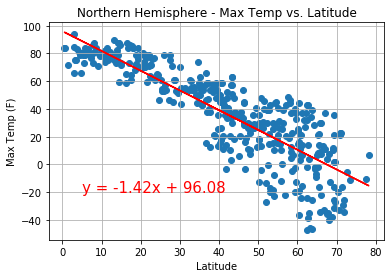

R-value: -0.850599726529205, P-value: 2.5225621428631256e-112


In [118]:
nmax=northern['Max Temp']
nlat=northern['Lat']

lregress(nlat,nmax)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x-value for location of line equation-50
y-value for location of line equation45
Title of figure:Southern Hemisphere - Max Temp vs. Latitude
X-label:Latitude
Y-label:Max Temp (F)


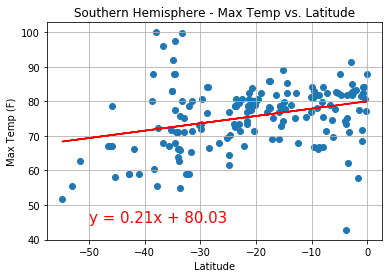

R-value: 0.31455020997006644, P-value: 2.9471679976717795e-05


In [119]:
smax=southern['Max Temp']
slat=southern['Lat']

lregress(slat,smax)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x-value for location of line equation45
y-value for location of line equation30
Title of figure:Northern Hemisphere - Humidity (%) vs. Latitude
X-label:Latitude
Y-label:Humidity (%)


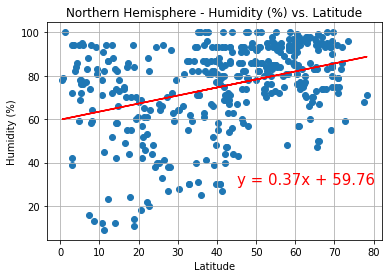

R-value: 0.3614763806028924, P-value: 1.0659513067598027e-13


In [120]:
nhumidity=northern['Humidity']

lregress(nlat,nhumidity)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x-value for location of line equation-50
y-value for location of line equation30
Title of figure:Southern Hemisphere - Humidity (%) vs. Latitude
X-label:Latitude
Y-label:Humidity (%)


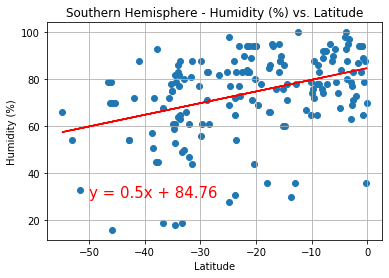

R-value: 0.37433404765460626, P-value: 4.936599081672712e-07


In [121]:
shumidity=southern['Humidity']

lregress(slat,shumidity)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x-value for location of line equation40
y-value for location of line equation30
Title of figure:Northern Hemisphere - Cloudiness (%) vs. Latitude
X-label:Latitude
Y-label:Cloudiness (%)


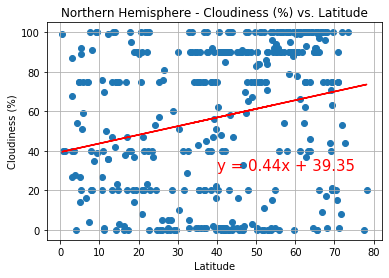

R-value: 0.23113111963355695, P-value: 3.257166087903569e-06


In [122]:
nclouds=northern['Cloudiness']

lregress(nlat,nclouds)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x-value for location of line equation-55
y-value for location of line equation20
Title of figure:Southern Hemisphere - Cloudiness (%) vs. Latitude
X-label:Latitude
Y-label:Cloudiness (%)


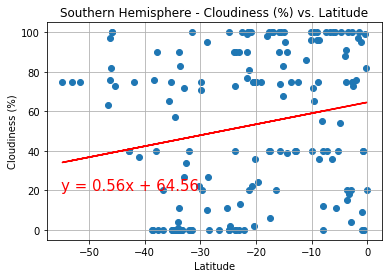

R-value: 0.19808833570793083, P-value: 0.009614008886050882


In [123]:
sclouds=southern['Cloudiness']

lregress(slat,sclouds)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x-value for location of line equation5
y-value for location of line equation30
Title of figure:Northern Hemisphere - Wind Speed (mph) vs. Latitude
X-label:Latitude
Y-label:Wind Speed (mph)


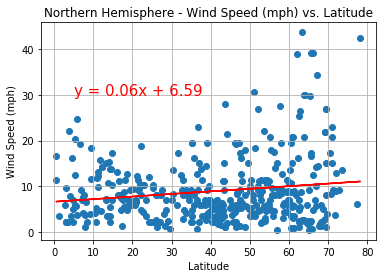

R-value: 0.1548825346911942, P-value: 0.0019682721578637616


In [124]:
nwind=northern['Wind Speed']

lregress(nlat,nwind)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x-value for location of line equation-50
y-value for location of line equation25
Title of figure:Southern Hemisphere - Wind Speed (mph) vs. Latitude
X-label:Latitude
Y-label:Wind Speed (mph)


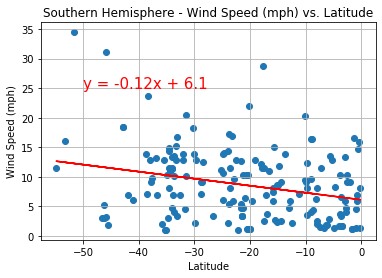

R-value: -0.26738047004674026, P-value: 0.000423654295766582


In [126]:
swind=southern['Wind Speed']

lregress(slat,swind)